In [2]:
import requests

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

currencys = pd.read_csv('exchange_rates.csv')
usd_curr = currencys[currencys["currency"] == "USD"]
rub_curr = currencys[currencys["currency"] == "RUB"]
usd_curr

,Unnamed: 0,Country/Currency,currency,value,date
5,5,USA Dollar,USD,1.132548,17/12/2021
155,155,USA Dollar,USD,1.123810,18/12/2021
305,305,USA Dollar,USD,1.123810,19/12/2021
455,455,USA Dollar,USD,1.124405,20/12/2021
605,605,USA Dollar,USD,1.128382,21/12/2021
...,...,...,...,...,...
129106,129106,USA Dollar,USD,1.070262,27/04/2024
129255,129255,USA Dollar,USD,1.070262,28/04/2024
129404,129404,USA Dollar,USD,1.070836,29/04/2024
129553,129553,USA Dollar,USD,1.071140,30/04/2024


In [4]:
usd_curr
rub_curr

,Unnamed: 0,Country/Currency,currency,value,date
115,115,Russia Rouble,RUB,83.646015,17/12/2021
265,265,Russia Rouble,RUB,83.357348,18/12/2021
415,415,Russia Rouble,RUB,83.357348,19/12/2021
565,565,Russia Rouble,RUB,83.647292,20/12/2021
715,715,Russia Rouble,RUB,83.602695,21/12/2021
...,...,...,...,...,...
129215,129215,Russia Rouble,RUB,98.764202,27/04/2024
129364,129364,Russia Rouble,RUB,98.764202,28/04/2024
129513,129513,Russia Rouble,RUB,98.817363,29/04/2024
129662,129662,Russia Rouble,RUB,100.076204,30/04/2024


In [5]:
# df.groupby('value').value.transform(lambda k: k - k.reset_index().index)

usd_curr_2024 = usd_curr[usd_curr.date.str.contains("/2024")]
rub_curr_2024 = rub_curr[rub_curr.date.str.contains("/2024")]
usd_curr_2024

,Unnamed: 0,Country/Currency,currency,value,date
111718,111718,USA Dollar,USD,1.105456,01/01/2024
111866,111866,USA Dollar,USD,1.103698,02/01/2024
112014,112014,USA Dollar,USD,1.094448,03/01/2024
112162,112162,USA Dollar,USD,1.092544,04/01/2024
112310,112310,USA Dollar,USD,1.094619,05/01/2024
...,...,...,...,...,...
129106,129106,USA Dollar,USD,1.070262,27/04/2024
129255,129255,USA Dollar,USD,1.070262,28/04/2024
129404,129404,USA Dollar,USD,1.070836,29/04/2024
129553,129553,USA Dollar,USD,1.071140,30/04/2024


In [6]:
usd_curr_2024.describe()

data = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()
ratio = data["Valute"]["USD"]["Value"]

ConnectionError: HTTPSConnectionPool(host='www.cbr-xml-daily.ru', port=443): Max retries exceeded with url: /daily_json.js (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x12f53dac0>: Failed to resolve 'www.cbr-xml-daily.ru' ([Errno 8] nodename nor servname provided, or not known)"))

In [ ]:
plt.plot(usd_curr_2024.date, usd_curr_2024.value, label="usd")
plt.plot(rub_curr_2024.date, rub_curr_2024.groupby("value").value.transform(lambda v: v / ratio), label="rub")
plt.legend()

In [7]:
# df.set_index('key').join(other.set_index('key'))

In [8]:
usd_curr_2024 = usd_curr_2024.drop(["Unnamed: 0", "Country/Currency"], axis=1)
usd_curr_2024 = usd_curr_2024.rename(columns={"currency": "USD curr"})
rub_curr_2024 = rub_curr_2024.drop(["Unnamed: 0", "Country/Currency"], axis=1)
rub_curr_2024 = rub_curr_2024.rename(columns={"currency": "RUB curr", "value": "ru value"})

In [9]:
rub_curr_2024

,RUB curr,ru value,date
111826,RUB,98.662158,01/01/2024
111974,RUB,98.504900,02/01/2024
112122,RUB,98.971373,03/01/2024
112270,RUB,100.513898,04/01/2024
112418,RUB,99.993175,05/01/2024
...,...,...,...
129215,RUB,98.764202,27/04/2024
129364,RUB,98.764202,28/04/2024
129513,RUB,98.817363,29/04/2024
129662,RUB,100.076204,30/04/2024


In [10]:
# result = pd.concat([df1, df4], axis=1)
# applying merge
# df_merged = df1.merge(df2[['Name', 'Grade', 'Rank']])
# print(df_merged)

new_curr = usd_curr_2024.merge(rub_curr_2024[["date","RUB curr", "ru value"]])
normalize_value = 1 / new_curr.value
new_curr["ratio"] = new_curr["ru value"] / normalize_value
new_curr

,USD curr,value,date,RUB curr,ru value,ratio
0,USD,1.105456,01/01/2024,RUB,98.662158,109.066675
1,USD,1.103698,02/01/2024,RUB,98.504900,108.719661
2,USD,1.094448,03/01/2024,RUB,98.971373,108.319021
3,USD,1.092544,04/01/2024,RUB,100.513898,109.815856
4,USD,1.094619,05/01/2024,RUB,99.993175,109.454429
...,...,...,...,...,...,...
117,USD,1.070262,27/04/2024,RUB,98.764202,105.703572
118,USD,1.070262,28/04/2024,RUB,98.764202,105.703572
119,USD,1.070836,29/04/2024,RUB,98.817363,105.817190
120,USD,1.071140,30/04/2024,RUB,100.076204,107.195625


NameError: name 'ratio' is not defined

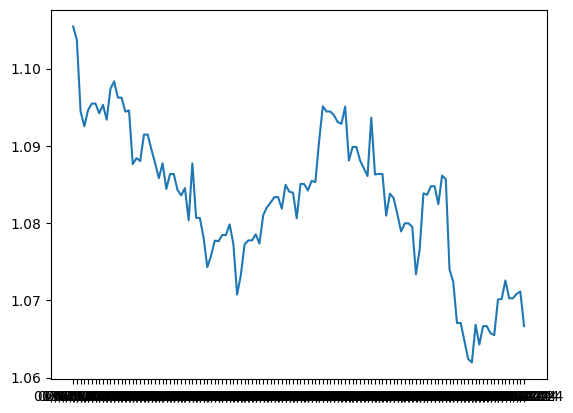

In [11]:
plt.plot(new_curr.date, new_curr.value, label="usd")
plt.plot(new_curr.date, new_curr.groupby("ru value")["ru value"].transform(lambda v: v / ratio), label="rub")
plt.legend()

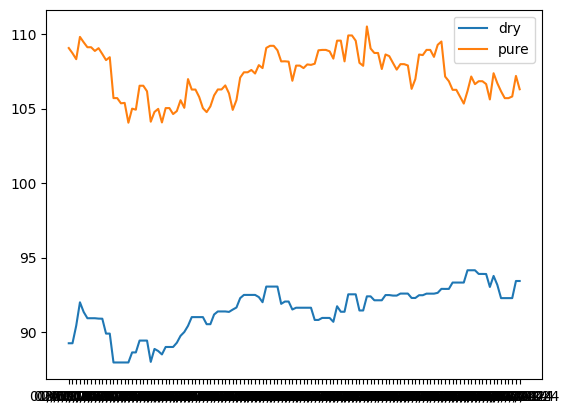

In [12]:
plt.plot(new_curr.date, new_curr.groupby("ru value")["ru value"].transform(lambda v: v / new_curr.value), label="dry")
plt.plot(new_curr.date, new_curr.ratio, label="pure")
plt.legend()

In [13]:
new_curr['ps'] = (new_curr.ratio + new_curr["ru value"] / new_curr["value"] )/ 2

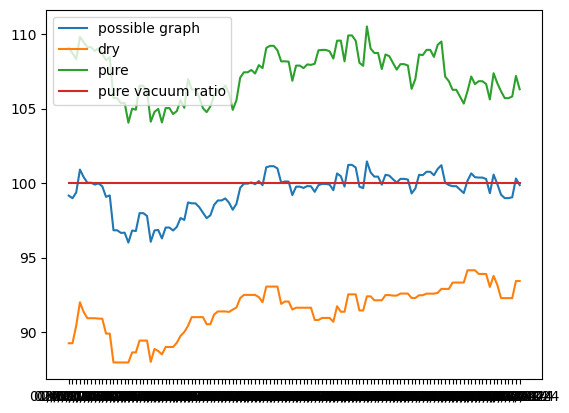

In [14]:
plt.plot(new_curr.date, new_curr.ps, label="possible graph")
plt.plot(new_curr.date, new_curr.groupby("ru value")["ru value"].transform(lambda v: v / new_curr.value), label="dry")
plt.plot(new_curr.date, new_curr.ratio, label="pure")
plt.plot(new_curr.date, [100 for i in range(new_curr.date.count())], label="pure vacuum ratio")
plt.legend()

In [15]:
new_curr

,USD curr,value,date,RUB curr,ru value,ratio,ps
0,USD,1.105456,01/01/2024,RUB,98.662158,109.066675,99.158432
1,USD,1.103698,02/01/2024,RUB,98.504900,108.719661,98.984764
2,USD,1.094448,03/01/2024,RUB,98.971373,108.319021,99.374712
3,USD,1.092544,04/01/2024,RUB,100.513898,109.815856,100.907859
4,USD,1.094619,05/01/2024,RUB,99.993175,109.454429,100.402091
...,...,...,...,...,...,...,...
117,USD,1.070262,27/04/2024,RUB,98.764202,105.703572,98.991985
118,USD,1.070262,28/04/2024,RUB,98.764202,105.703572,98.991985
119,USD,1.070836,29/04/2024,RUB,98.817363,105.817190,99.048883
120,USD,1.071140,30/04/2024,RUB,100.076204,107.195625,100.312623


In [17]:
new_curr.date.count()

122